In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime , date

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the Customer Demographics Data from the excel file
cust_dem = pd.read_excel('Raw_data.xlsx', sheet_name='CustomerDemographic')

In [6]:
cust_dem.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0
8,9,Mala,Lind,Female,97,1973-03-10 00:00:00,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11 00:00:00,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0


In [4]:
cust_dem.shape

(4000, 13)

In [5]:
cust_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [7]:
cust_dem.dtypes

customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
default                                 object
owns_car                                object
tenure                                 float64
dtype: object

In [8]:
cust_dem.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [9]:
cust_dem.describe(include='object')

,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3913,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,3448,195,9,3,2,90,2
top,Max,Pristnor,Female,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,7,45,799,2000,3998,113,2024


In [10]:
cust_dem.count()

customer_id                            4000
first_name                             4000
last_name                              3875
gender                                 4000
past_3_years_bike_related_purchases    4000
DOB                                    3913
job_title                              3494
job_industry_category                  3344
wealth_segment                         4000
deceased_indicator                     4000
default                                3698
owns_car                               4000
tenure                                 3913
dtype: int64

In [11]:
# Total Records
print("Total records (rows) in the dataset : {}".format(cust_dem.shape[0]))
print("Total columns (features) in the dataset : {}".format(cust_dem.shape[1]))

Total records (rows) in the dataset : 4000
Total columns (features) in the dataset : 13


## 1. Dropping Irrelevant Columns

**default** is an irrelevent column. Hence it should be dropped.

In [12]:
cust_dem = cust_dem.drop(columns=['default'])

## 2. Missing Values Check

In [13]:
# Total missing values in each column
cust_dem.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [14]:
# Missing values in percentage
cust_dem.isnull().sum()/len(cust_dem)*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

<Axes: >

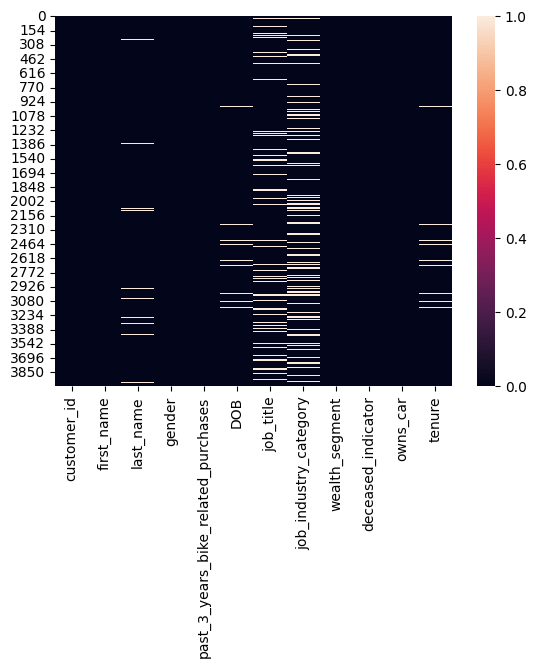

In [15]:
# Checking missing values with heatmap
sns.heatmap(cust_dem.isnull())

### 2.1 Last Name

In [16]:
# Checking for the presence of first name and customer id in records where last name is missing.
cust_dem[cust_dem['last_name'].isnull()][['first_name', 'customer_id']].isnull().sum()

first_name     0
customer_id    0
dtype: int64

Since All customers have a customer_id and First name, all the customers are identifiable. Hence it is okay for to not have a last name. Filling null last names with "None".

In [17]:
cust_dem['last_name'].fillna('None', axis = 0, inplace = True)

In [18]:
cust_dem['last_name'].isnull().sum()

0

### 2.2 DOB

In [19]:
# Fetching records where DOB is missing.
cust_dem[cust_dem['DOB'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaN,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaN,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaN,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaN,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaN,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaN,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaN,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaN,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaN,NaN,IT,High Net Worth,N,Yes,NaN


Since less than 5 % of data has null date of birth. we can remove the records where date of birth is null.

In [20]:
dob_index_drop = cust_dem[cust_dem['DOB'].isnull()].index
dob_index_drop

Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,  581,
        598,  679,  684,  798,  838,  882,  891,  949,  974,  982,  995, 1037,
       1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582, 1627, 1682, 1739,
       1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020, 2068, 2164, 2204, 2251,
       2294, 2334, 2340, 2413, 2425, 2468, 2539, 2641, 2646, 2695, 2696, 2853,
       2919, 2962, 2998, 3011, 3085, 3150, 3221, 3222, 3254, 3287, 3297, 3311,
       3321, 3342, 3364, 3472, 3509, 3512, 3564, 3653, 3717, 3726, 3778, 3882,
       3930, 3934, 3997],
      dtype='int64')

In [21]:
cust_dem.drop(index= dob_index_drop, inplace=True, axis = 0)

In [22]:
cust_dem['DOB'].isnull().sum()

0

### 2.3 Job Title

In [23]:
# Fetching records where Job Title is missing.
cust_dem[cust_dem['job_title'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,None,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0
5,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,N,Yes,11.0
10,11,Uriah,Bisatt,Male,99,1954-04-30 00:00:00,NaN,Property,Mass Customer,N,No,9.0
21,22,Deeanne,Durtnell,Female,79,1962-12-10 00:00:00,NaN,IT,Mass Customer,N,No,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3968,Alexandra,Kroch,Female,99,1977-12-22 00:00:00,NaN,Property,High Net Worth,N,No,22.0
3971,3972,Maribelle,Schaffel,Female,6,1979-03-28 00:00:00,NaN,Retail,Mass Customer,N,No,8.0
3978,3979,Kleon,Adam,Male,67,1974-07-13 00:00:00,NaN,Financial Services,Mass Customer,N,Yes,18.0
3986,3987,Beckie,Wakeham,Female,18,1964-05-29 00:00:00,NaN,Argiculture,Mass Customer,N,No,7.0


In [24]:
cust_dem['job_title'].nunique()

195

In [25]:
cust_dem['job_title'].value_counts()

job_title
Business Systems Development Analyst    43
Tax Accountant                          43
Social Worker                           42
Recruiting Manager                      41
Internal Auditor                        40
                                        ..
Database Administrator II                4
Health Coach III                         3
Health Coach I                           3
Research Assistant III                   3
Developer I                              1
Name: count, Length: 195, dtype: int64

In [26]:
cust_dem['job_title'].mode()

0    Business Systems Development Analyst
1                          Tax Accountant
Name: job_title, dtype: object

In [27]:
job_title_mode = cust_dem['job_title'].mode() [0]
cust_dem['job_title'].fillna(job_title_mode, inplace =True)

In [28]:
cust_dem['job_title'].isnull().sum()

0

### 2.4 Job Industry Category   

In [29]:
cust_dem[cust_dem['job_industry_category'].isnull()]   

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
7,8,Rod,Inder,Male,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,N,No,7.0
15,16,Harlin,Parr,Male,38,1977-02-27 00:00:00,Media Manager IV,NaN,Mass Customer,N,Yes,18.0
16,17,Heath,Faraday,Male,57,1962-03-19 00:00:00,Sales Associate,NaN,Affluent Customer,N,Yes,15.0
17,18,Marjie,Neasham,Female,79,1967-07-06 00:00:00,Professor,NaN,Affluent Customer,N,No,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3965,3966,Astrix,Sigward,Female,53,1968-09-15 00:00:00,Geologist I,NaN,Mass Customer,N,Yes,11.0
3973,3974,Misha,Ranklin,Female,82,1961-02-11 00:00:00,Technical Writer,NaN,Affluent Customer,N,Yes,9.0
3975,3976,Gretel,Chrystal,Female,0,1957-11-20 00:00:00,Internal Auditor,NaN,Affluent Customer,N,Yes,13.0
3982,3983,Jarred,Lyste,Male,19,1965-04-21 00:00:00,Graphic Designer,NaN,Mass Customer,N,Yes,9.0


In [30]:
cust_dem['job_industry_category'].nunique()

9

In [31]:
cust_dem['job_industry_category'].unique()

array(['Health', 'Financial Services', 'Property', 'IT', nan, 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [32]:
cust_dem['job_industry_category'].value_counts()

job_industry_category
Manufacturing         796
Financial Services    767
Health                596
Retail                358
Property              267
IT                    152
Entertainment         136
Argiculture           113
Telecommunications     72
Name: count, dtype: int64

Since 16.5% values are missing, so we can't replace them with job industry mode, so we simply add **Missing** as their values.

In [33]:
cust_dem['job_industry_category'].fillna('Missing', inplace=True, axis=0)
cust_dem['job_industry_category'].isnull().sum()

0

### 2.5 Tenure


When Date of Birth was Null the Tenure was also Null. Hence after removing null DOBs from dataframe , null tenures were also removed.

In [34]:
cust_dem['tenure'].isnull().sum()

0

In [35]:
cust_dem.isnull().mean()*100

customer_id                            0.0
first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
DOB                                    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
owns_car                               0.0
tenure                                 0.0
dtype: float64

## 3. Inconsistency Check

#### 3.1 Gender

In [36]:
cust_dem['gender'].value_counts()

gender
Female    2037
Male      1872
F            1
U            1
Femal        1
M            1
Name: count, dtype: int64

In [37]:
# Making Gender as Male and Female as standards by using following function
def replace_gender_names(gender):
    
    if gender=='M':
        return 'Male'
    elif gender=='F':
        return 'Female'
    elif gender=='Femal':
        return 'Female'
    else :
        return gender

cust_dem['gender'] = cust_dem['gender'].apply(replace_gender_names)

### 3.2 DOB

In [38]:
cust_dem['DOB']

0       1953-10-12 00:00:00
1       1980-12-16 00:00:00
2       1954-01-20 00:00:00
3       1961-10-03 00:00:00
4       1977-05-13 00:00:00
               ...         
3994    1975-12-12 00:00:00
3995    1975-08-09 00:00:00
3996    2001-07-13 00:00:00
3998    1973-10-24 00:00:00
3999    1991-11-05 00:00:00
Name: DOB, Length: 3913, dtype: object

Creating Age Column for checking further descripency in data.

In [39]:
# First changing DOB column in datetime format.

cust_dem['DOB'] = pd.to_datetime(cust_dem['DOB'])

# Function to calculate the age as of today based on the DOB of the customer.

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

cust_dem['age'] = cust_dem['DOB'].apply(calculate_age)
print(cust_dem['age'])

0       69
1       42
2       69
3       61
4       46
        ..
3994    47
3995    48
3996    22
3998    49
3999    31
Name: age, Length: 3913, dtype: int64


Creating Age group for further analysis.

In [40]:
cust_dem['age_group'] = pd.cut(cust_dem['age'], bins=[0,20,30,40,50,60,70,80,90], labels=['20','30','40','50','60','70','80','90'])

_Other way is to use Lambda function_

In [41]:
# cust_dem['Age Group'] = cust_dem['age'].apply(lambda x : (math.floor(x/10)+1)*10)

In [42]:
cust_dem.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69,70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42,50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69,70
3,4,Talbot,None,Male,33,1961-10-03,Business Systems Development Analyst,IT,Mass Customer,N,No,7.0,61,70
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,46,50
5,6,Curr,Duckhouse,Male,35,1966-09-16,Business Systems Development Analyst,Retail,High Net Worth,N,Yes,13.0,56,60
6,7,Fina,Merali,Female,6,1976-02-23,Business Systems Development Analyst,Financial Services,Affluent Customer,N,Yes,11.0,47,50
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,Missing,Mass Customer,N,No,7.0,61,70
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,50,50
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,34,40


<Axes: xlabel='age_group'>

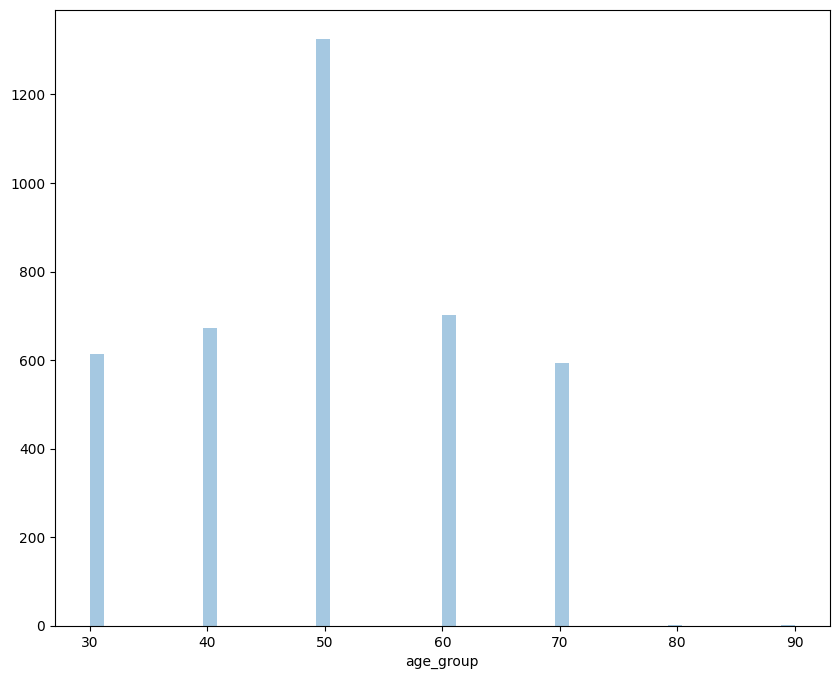

In [43]:
# Viz to find out the Age Group Distribution
plt.figure(figsize=(10,8))
sns.distplot(cust_dem['age_group'], kde=False, bins=50)

### 3.3 Wealth Segment

In [44]:
cust_dem['wealth_segment'].value_counts()

wealth_segment
Mass Customer        1954
High Net Worth        996
Affluent Customer     963
Name: count, dtype: int64

There is no inconsistent data in wealth_segment column.

### 3.4 Deceased Indicator

In [45]:
cust_dem['deceased_indicator'].value_counts()

deceased_indicator
N    3911
Y       2
Name: count, dtype: int64

There is no inconsistent data in deceased_indicator column.

### 3.5 Owns a Car

In [46]:
cust_dem['owns_car'].value_counts()

owns_car
Yes    1974
No     1939
Name: count, dtype: int64

There is no inconsistent data in owns_car column.


### 4. Duplication Check

In [47]:
# Dropping the primary key column i.e customer_id and storing into a temporary dataframe.
cust_dem_dedupped = cust_dem.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(cust_dem_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(cust_dem.shape[0]))

Number of records after removing customer_id (pk), duplicates : 3913
Number of records in original dataset : 3913


Since both the numbers are same. There are no duplicate records in the dataset.

### 5. Outlier Check

<Axes: >

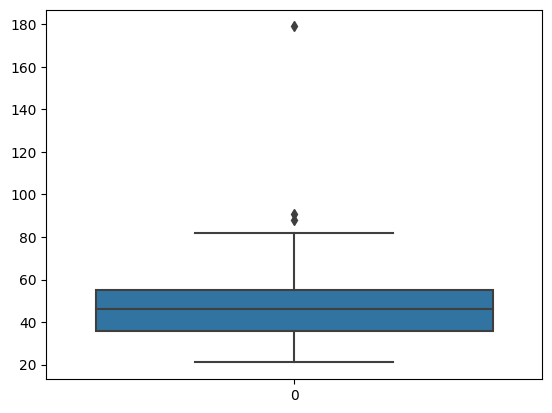

In [48]:
sns.boxplot(cust_dem['age'])

<Axes: xlabel='age'>

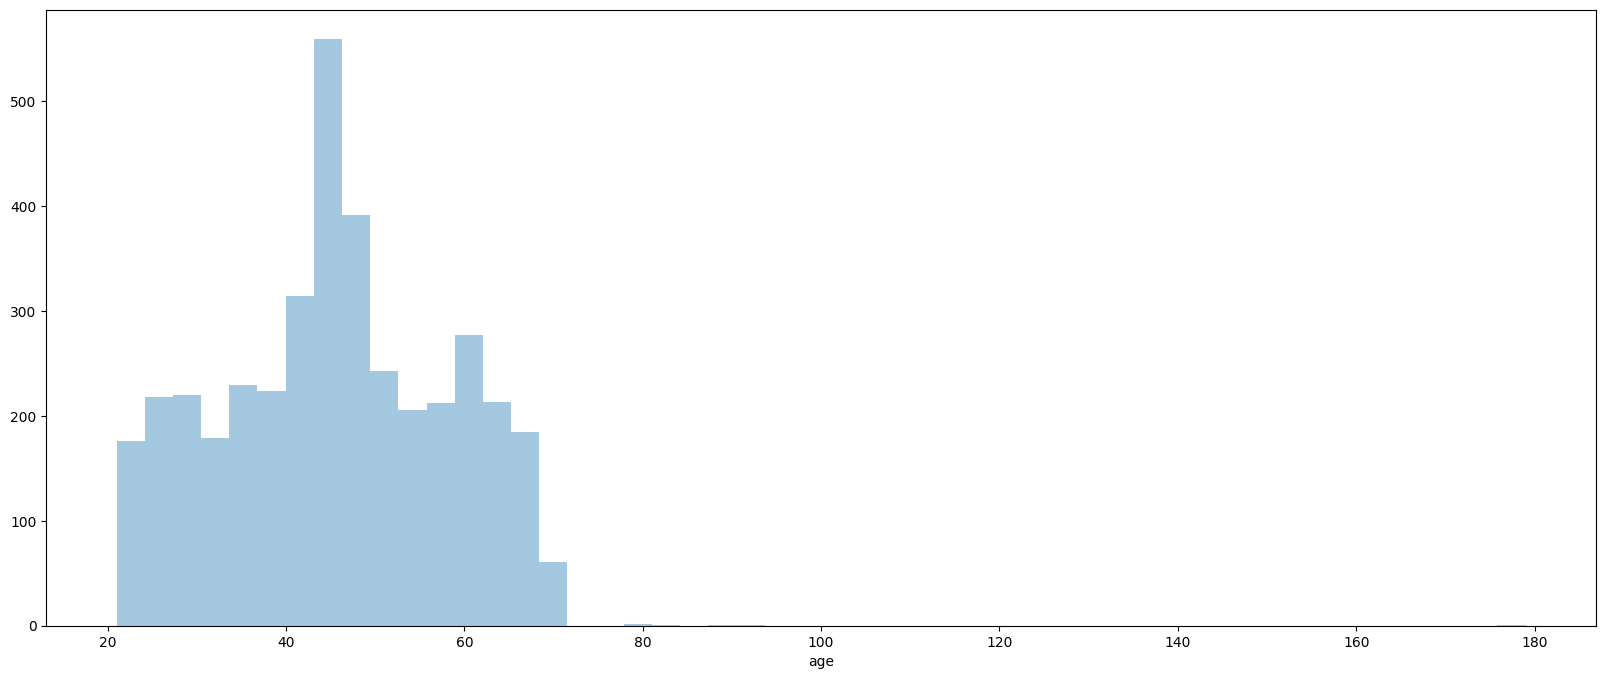

In [49]:
plt.figure(figsize=(20,8))
sns.distplot(cust_dem['age'], kde=False, bins=50)

As we can see from above graphs, there are possible outliers in age whose values is greater than 100.

In [50]:
cust_dem[cust_dem['age'] > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,179,NaN


Here we see a customer with age 177 which is an outlier. hence we need to remove this record.

In [51]:
age_index_drop = cust_dem[cust_dem['age']>100].index
cust_dem.drop(index=age_index_drop, inplace=True, axis=0)

In [52]:
# Exporting the Cleaned Customer Demographic Data Set to csv
cust_dem.to_csv('CustomerDemographic_Cleaned.csv', index = False)